##Task 1 (Generators and lists comprehensions refresher)
Calculate a value of a polynomial for a vector of x coordinates using single line list comprehension expression and a generator.

You must apply the enumerate() and sum() functions

Test code:
```
c = [1,2,3]
x = [0, 2, 4, 8]
p = _____
print(p)
```

Should print:
[1, 17, 57, 209]

where c is the vector of ceofficients of the polynomial: p(x) = c(0) + c(1)*x + c(2)*x**2.

In [1]:
C = [1,2,3]
X = [0,2,4,8]

[ sum((( c*x**i ) for i, c in enumerate(C))) for x in X]

[1, 17, 57, 209]

##Task 2
Generate a smooth polynomial plot from Task 1 using dense vector of x coordinates
```
n = 100
xd = [8*x/n for x in range(n)]
```
Example of using a plot:
```
import matplotlib.pyplot as plt
x = [8*i/100 for i in range(0,100)]
y = [x**2 for x in x]
plt.plot(x,y)
```

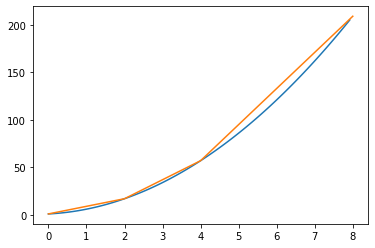

In [2]:
import matplotlib.pyplot as plt

Xd = [8*i/100 for i in range(0,100)]
Yd = [ sum((( c*x**i ) for i, c in enumerate(C))) for x in Xd]

X = [0,2,4,8]
Y = [ sum((( c*x**i ) for i, c in enumerate(C))) for x in X]

plt.plot(Xd,Yd)
plt.plot(X, Y)

##Task 3
Using a conditiional list comprehension, convert all occurrences of the letter 'e' in the following string to uppercase: thepurposeoflife

You can use ''.join( alist ) to join a list of characters into a single string.
```
upperstr = 'thepurposeoflife'
upperstr = ______
print(upperstr)
```

In [4]:
s = 'thepurposeoflife'

"".join( ('E' if c=='e' else c for c in s))

'thEpurposEoflifE'

##Task 4 - tuples as records
Use the following tuple of tuples
```
records = (('Sam', 19, 'CS'),
('Nicole', 21, 'Biochemistry'),
('Paul', 20, 'Fine Arts'),
('Ashley', 18, 'History'))
```
iterate over the records, unpack them, and print the results
This might be useful syntax for printing:
```
print('%s and %d and %s', % ('a string', 10, 'another string'))
```
Make a function as well to complete the following:
```
def showrecords(records):  
    '''Unpack records stored in a tuple of tuples and print each one in a nice format'''
    ...  
showrecords(___)
```

In [5]:
records = (('Sam', 19, 'CS'),
('Nicole', 21, 'Biochemistry'),
('Paul', 20, 'Fine Arts'),
('Ashley', 18, 'History'))

In [6]:
for name, age, course in records:
  print(f"| {name:<10} | {age:>6} | | {course:^20} | ")

| Sam        |     19 | |          CS          | 
| Nicole     |     21 | |     Biochemistry     | 
| Paul       |     20 | |      Fine Arts       | 
| Ashley     |     18 | |       History        | 


In [7]:
def showrecords(records):  
    '''Unpack records stored in a tuple of tuples and print each one in a nice format'''
    for name, age, course in records:
      print(f"| {name:<10} | {age:>6} | | {course:^20} | ") 


In [8]:
showrecords(records)

| Sam        |     19 | |          CS          | 
| Nicole     |     21 | |     Biochemistry     | 
| Paul       |     20 | |      Fine Arts       | 
| Ashley     |     18 | |       History        | 


## Task 5 - Closures
Make a nested function and a python closure to make functions to get multiple multiplication functions using closures. That is using closures, one could make functions to create multiply_with_5() or multiply_with_4() functions using closures.

```
def multiplier_of(n):
  ____

# test code
multiply_with_5 = multiplier_of(5)
print(multiply_with_5(9))
# should return 45

multiply_with_45 = multiplier_of(multiply_with_5(9))
print(multiply_with_45(2))
# should return: 90
```

In [11]:
def multiplier_of(m):
  def _multiplier(x):
    return m*x
  return _multiplier

multiply_with_5 = multiplier_of(5)
print(multiply_with_5(9))

multiply_with_45 = multiplier_of(multiply_with_5(9))
print(multiply_with_45(2))

45
90


##Task 6 - decorators with arguments
Make a decorator factory which returns a decorator that decorates functions with one argument. The factory should take one argument, a type, and then returns a decorator that makes function should check if the input is the correct type. If it is wrong, it should print("Bad Type") (In reality, it should raise an error, but error raising isn't in this tutorial). Look at the tutorial code and expected output to see what it is if you are confused (I know I would be.) Using isinstance(object, type_of_object) or type(object) might help.
```
def type_check(correct_type):
    def check(old_function):

        ____

    return check
  
# Use  isinstance(arg, correct_type) to check if arg is of correct type

@type_check(int)
def times2(num):
    return num*2

print(times2(2))
times2('Not A Number')

@type_check(str)
def first_letter(word):
    return word[0]

print(first_letter('Hello World'))
first_letter(['Not', 'A', 'String'])
```
Should produce:
```
4
Bad Type
H
Bad Type
```

In [13]:
def type_check(correct_type):
    def check(old_function):
        def _wrapper(x):
          if type(x) != correct_type:
            print(f"Warning! Bad Type ({type(x)} for value {x} when epected {str(correct_type)})!")
          return old_function(x)
        return _wrapper
    return check

@type_check(int)
def times2(num):
    return num*2

print(times2(2))
print(times2('Not A Number'))

@type_check(str)
def first_letter(word):
    return word[0]

print(first_letter('Hello World'))
first_letter(['Not', 'A', 'String'])

4
Warning! Bad Type (<class 'str'> for value Not A Number when epected <class 'int'>)!
Not A NumberNot A Number
H
Warning! Bad Type (<class 'list'> for value ['Not', 'A', 'String'] when epected <class 'str'>)!


'Not'

##Task 7 - Registering Plugins
Decorators don’t have to wrap the function they’re decorating. They can also simply register that a function exists and return it unwrapped. This can be used, for instance, to create a light-weight plug-in architecture:
```
import random
PLUGINS = dict()

def register(func):
    ______

@register
def say_hello(name):
    return f"Hello {name}"

@register
def be_awesome(name):
    return f"Yo {name}, together we are the awesomest!"

def randomly_greet(name):
    greeter, greeter_func = random.choice(list(PLUGINS.items()))
    print(f"Using {greeter!r}")
    return greeter_func(name)
  
randomly_greet('John')
```  

In [14]:
import random
PLUGINS = dict()

def register(func):
    print(f"{func.__name__}")
    PLUGINS[func.__name__] = func
    return func

@register
def say_hello(name):
    return f"Hello {name}"

@register
def be_awesome(name):
    return f"Yo {name}, together we are the awesomest!"

def randomly_greet(name):

    @register
    def extra_plugin_internal(n):
      print(f"Extra nice welcome: {n}")
      
    if len(PLUGINS.items()) >  0:
      greeter, greeter_func = random.choice(list(PLUGINS.items()))
      # print(f"Using {greeter!r}")
      return greeter_func(name)
    print("Something wrong! No plugins registered!")

print(randomly_greet('John'))
print(randomly_greet('John'))
print(randomly_greet('John'))
print(randomly_greet('John'))
print(randomly_greet('John'))
print(randomly_greet('John'))

say_hello
be_awesome
extra_plugin_internal
Extra nice welcome: John
None
extra_plugin_internal
Extra nice welcome: John
None
extra_plugin_internal
Yo John, together we are the awesomest!
extra_plugin_internal
Yo John, together we are the awesomest!
extra_plugin_internal
Yo John, together we are the awesomest!
extra_plugin_internal
Hello John
